## Redes Neurais Artificiais 2025.1

- **Disciplina**: Redes Neurais Artificiais 2025.1  
- **Professora**: Elloá B. Guedes (ebgcosta@uea.edu.br)  
- **Github**: http://github.com/elloa  

|Alunos                |Matrícula  |
|----------------------|-----------|
|Caio Bertoldo         |2215080050 |
|Danilo Jorge          |2215080007 |
|Diogo Gomes           |2215080033 |
|Guilherme Montenegro  |2215080011 |
|Leonardo Abinader     |2215080042 |
|Rodolfo Simões        |2215080073 |

### Explorando a base de dados: **_Air Quality and Pollution Assessment._**

Link da base de dados: https://www.kaggle.com/datasets/mujtabamatin/air-quality-and-pollution-assessment

In [2]:
# Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
import warnings
warnings.filterwarnings("ignore")

### Verifcando os dados

In [3]:
# Abrindo o dataset
df = pd.read_csv("datasets/updated_pollution_dataset.csv")

In [4]:
# Vendo os 5 primeiros exemplos
df.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


In [5]:
# Quantidade de exemplos
df.shape[0]

5000

In [6]:
# Vendo informações sobre o dataset (atributos e seus tipos de dado)
df.info(memory_usage=False, show_counts=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   Temperature                    float64
 1   Humidity                       float64
 2   PM2.5                          float64
 3   PM10                           float64
 4   NO2                            float64
 5   SO2                            float64
 6   CO                             float64
 7   Proximity_to_Industrial_Areas  float64
 8   Population_Density             int64  
 9   Air Quality                    object 
dtypes: float64(8), int64(1), object(1)

In [7]:
# Verifcando se há valores nulos
df.isnull().sum()

Temperature                      0
Humidity                         0
PM2.5                            0
PM10                             0
NO2                              0
SO2                              0
CO                               0
Proximity_to_Industrial_Areas    0
Population_Density               0
Air Quality                      0
dtype: int64

In [8]:
# Verificando se há dados duplicados
df.duplicated().sum()

0

In [9]:
# Vendo o atributo alvo
df['Air Quality'].value_counts()

Air Quality
Good         2000
Moderate     1500
Poor         1000
Hazardous     500
Name: count, dtype: int64

### Visualizando os dados

In [10]:
# Configuração visual
sns.set(style="white")
plt.rcParams["figure.figsize"] = (10, 6)

## 1. Distribuição das Classes de Qualidade do Ar:
Esse gráfico mostra a distribuição das classes da variável alvo "Air Quality" em um gráfico de barras. Essa visualização é fundamental para entender se o problema de classificação está balanceado ou possui classes majoritárias/minoritárias. Caso uma classe (por exemplo, "Moderate") esteja muito mais frequente que as outras ("Good", "Poor", etc.), isso pode indicar um desbalanceamento que pode impactar o desempenho dos modelos preditivos. 

A distribuição balanceada facilita o aprendizado dos modelos, pois todos os padrões têm a mesma importância. Já um desbalanceamento pode levar o modelo a priorizar acertos na classe majoritária, prejudicando a precisão para as classes menos frequentes. Por isso, a análise é sempre o primeiro passo em um problema de classificação.

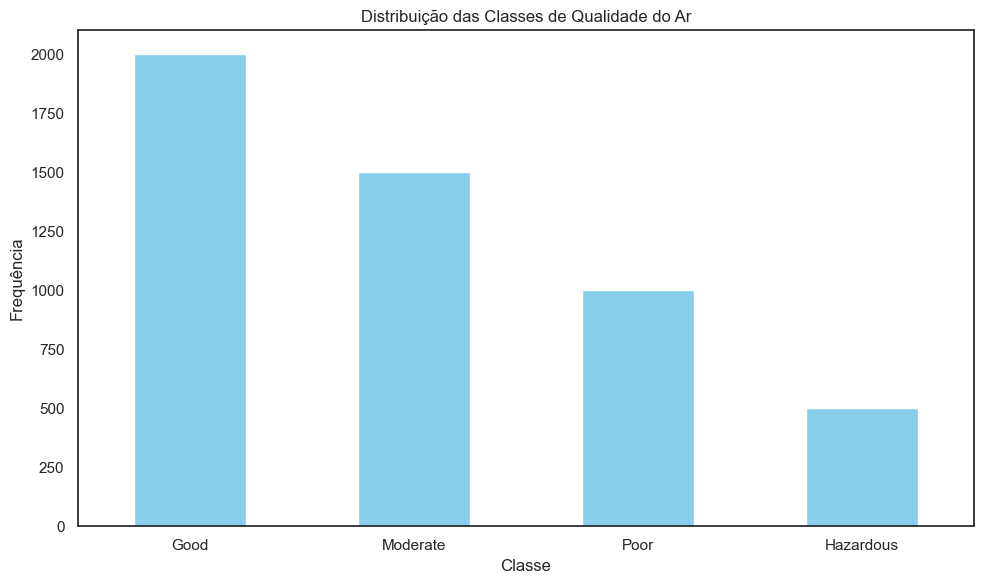

In [11]:
# Ver distribuição da variável alvo
df['Air Quality'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Distribuição das Classes de Qualidade do Ar")
plt.xlabel("Classe")
plt.ylabel("Frequência")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## 2. Histogramas das Variáveis Numéricas

Abaixo, temos histogramas mostrando a distribuição de cada variável numérica (como Temperature, Humidity, PM2.5, PM10, NO2, SO2, CO, Proximity_to_Industrial_Areas e Population_Desity). Pelo histograma, é possível identificar se o atributo segue uma distribuição próxima à normal (gaussiana), assimétrica, possui caudas longas ou é multimodal. Por exemplo, atributos ambientais como Temperatura e Humidade costumam se aproximar de distribvuições normais, enquanto poluentes como PM2.5, PM10 e gases podem apresentar distribuições mais enviesadas (assimétricas), concentradas em valores baixos e cauda longa à direita (com alguns poucos valores altos).

A identificação da distribuição é útil para ajustar modelos (alguns assumem normalidade), para normalização/padronização dos dados e para entender possíveis outliers. Por exemplo, se CO ou NO2 têm uma cauda longa, modelos sensíveis a outliers podem ser impactados negativamente.

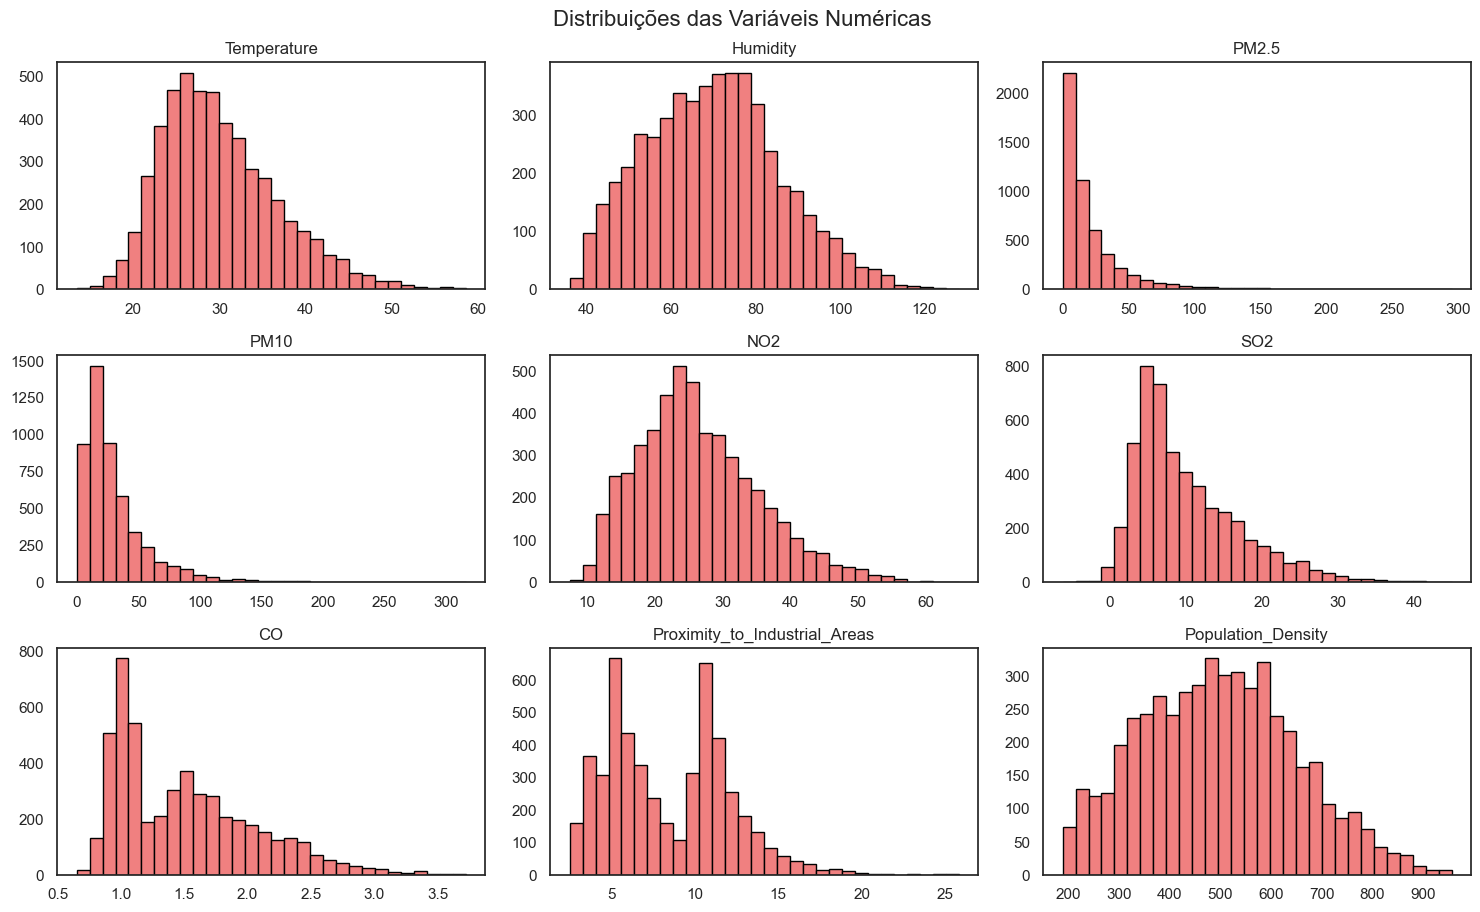

In [12]:
# Histogramas das variáveis numéricas
numeric_cols = df.select_dtypes(include='number').columns

df[numeric_cols].hist(bins=30, figsize=(15, 12), layout=(4, 3), color='lightcoral', edgecolor='black', grid=False)
plt.suptitle("Distribuições das Variáveis Numéricas", fontsize=16)
plt.tight_layout()
plt.show()

### 1.1 - Distribuição de cada atributo

* Temperature, Humidity: Geraç=lmente próximas de uma distribuição normal (Gaussiana), podendo ter leve assimetria, comum em variáveis ambientais.
* PM2.5, PM10, NO2, SO2, CO: Tendem a distribuições assimétricas à direita (cauda longa), ou seja, muitos valores baixos e poucos valores altos.
* Proximity_to_Industrial_Areas: Depende do contexto, mas pode apresentar distribuição concentrada em alguns valores, conforme a amostragem de áreas industriais.
* Population_Density: Pode ser enviesada, pois normalmente há poucas áreas muito densas e muitas de baixa densidade.

## 3. Matriz de Correlação 

O heatmap de correlação mostra o quanto cada variável numérica está relacionada com as demais. Valores próximos de 1 ou -1 indicam forte correlação positiva ou negativa, enquanto valores próximos de 0 indicam ausência de relação linear. Se dois atributos são fortemente correlacionados (ex: PM2.5 e PM10), eles trazem informação semelhante, já se não são, carregam informação distinta.

Olhando a matriz, podemos identificar pares com maior correlação positiva (por exemplo, se PM2.5 e PM10 forem altos juntos) e também casos de correlação negativa, como o atributo "Proximity_to_Industrial_Areas" mostrando valores negativos com os demais atributos. Isso significa que, quanto maior a proximidade de áreas industriais, menor a presença (ou valor) dos outros atributos, sugerindo que "Proximity_to_Industrial_Areas" pode carregar uma relação inversa com os demais fatores ambientais/poluentes.

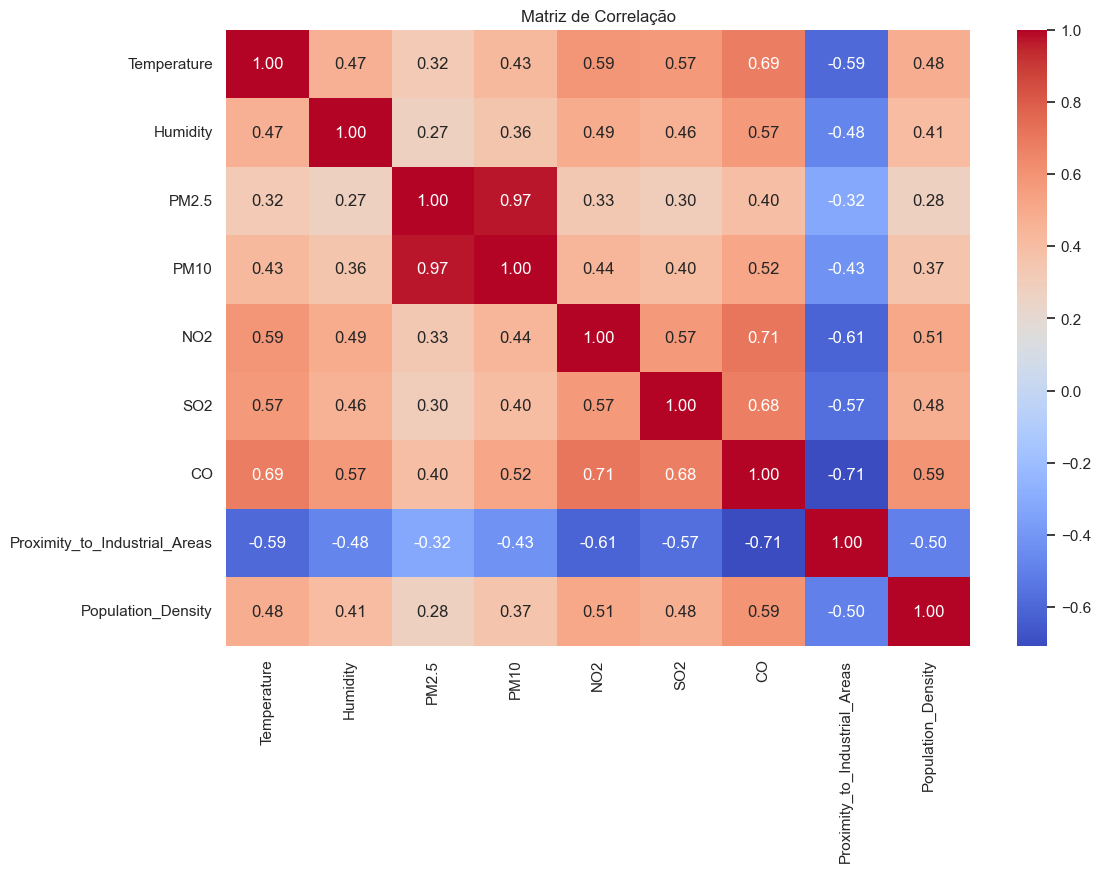

In [13]:
# Matriz de correlação
plt.figure(figsize=(12, 8))
correlation_matrix = df.drop(columns=['Air Quality']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

### 1.2 - Matriz de Correlação: Correlações relevantes
* PM2.5 e PM10: Geralmente são altamente correlacionados, pois ambos são medidas de partículas em suspensão.
* NO2, SO2, CO: Podem apresentar correlação entre si, pois são poluentes atmosféricos, podendo indicar que suas fontes de emissão são semelhantes.
* Population_Density: Pode mostrar correlação com alguns poluentes, pois áreas mais densas tendem a mais poluição.

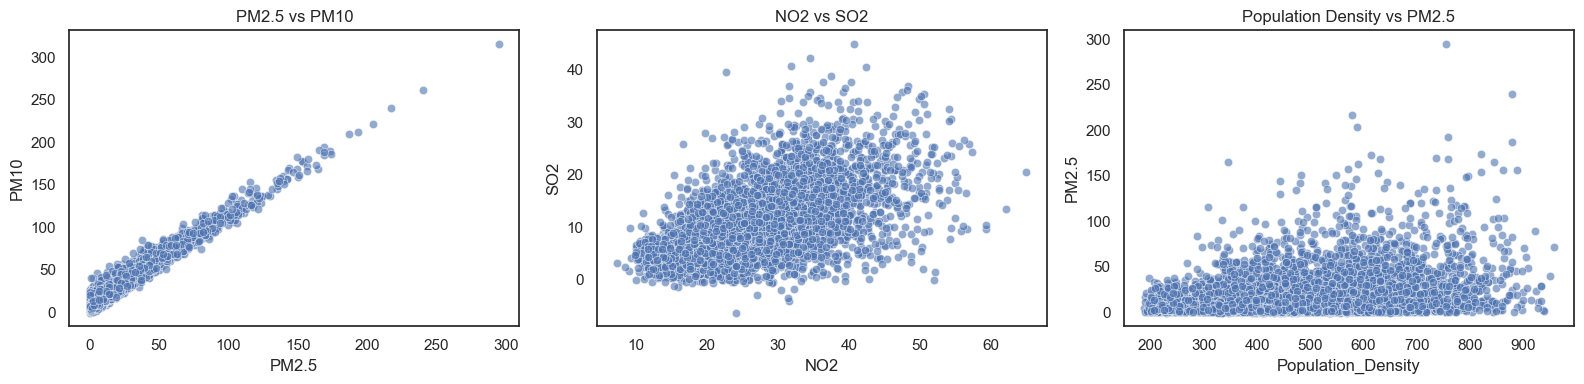

In [15]:
plt.figure(figsize=(16, 4))

plt.subplot(1, 3, 1)
sns.scatterplot(data=df, x='PM2.5', y='PM10', alpha=0.6)
plt.title('PM2.5 vs PM10')

plt.subplot(1, 3, 2)
sns.scatterplot(data=df, x='NO2', y='SO2', alpha=0.6)
plt.title('NO2 vs SO2')

plt.subplot(1, 3, 3)
sns.scatterplot(data=df, x='Population_Density', y='PM2.5', alpha=0.6)
plt.title('Population Density vs PM2.5')

plt.tight_layout()
plt.show()

#### 1. PM2.5 vs PM10
O gráfico de dispersão entre PM2.5 e PM10 mostra uma forte correlação positiva, o que já era esperado, já que ambos medem partículas em suspensão no ar, mas de tamanhos diferentes. Conforme os valores de PM2.5 aumentam, os valores de PM10 também tendem a crescer, indicando que fontes que aumentam partículas menores geralmente aumentam também as maiores. Isso sugere que, para fins de modelagem, esses dois atributos carregam informações semelhantes e, em alguns casos, pode-se até considerar a utilização de apenas um deles ou criar uma variável combinada, especialmente em modelos lineares para evitar multicolinearidade.

#### 2. NO2 vs SO2

O scatterplot de NO2 versus SO2 evidencia uma correlação moderada entre esses dois gases, ambos comumente associados à poluição do ar gerada por processos industriais e queima de combustíveis fósseis. A relação não é perfeitamente linear, mas observa-se que concentrações mais altas de NO2 tendem a estar associadas a valores mais altos de SO2. Esse padrão sugere que regiões ou situações com picos de poluição por um desses gases costumam apresentar níveis elevados do outro, possivelmente devido a fontes de emissão semelhantes (tráfego, indústrias).



#### 3. Population Density vs PM2.5

No gráfico que compara Population Density (densidade populacional) com PM2.5, percebe-se uma tendência de que áreas com maior densidade populacional tenham maior concentração de partículas finas (PM2.5), embora a relação não seja perfeitamente linear e haja bastante dispersão. Isso indica que, apesar de outros fatores influenciarem a qualidade do ar, regiões mais densamente povoadas estão mais sujeitas a níveis elevados de poluição do ar, provavelmente devido ao aumento do trânsito, atividades humanas e presença de fontes poluentes.

### 1.3 - Proximity_to_Industrial_Areas tem correlação negativa com todos os outros atributos. O que isso significa ?

* Valores negativos na matriz de correlação significam que, à medida que o valor de “Proximity_to_Industrial_Areas” aumenta, os demais atributos tendem a diminuir, e vice-versa. Em outras palavras, lugares mais próximos de áreas industriais (valores baixos nesse atributo, pois é proximidade) têm, em média, valores mais altos de poluentes e, possivelmente, piores índices de qualidade do ar.
* Isso faz sentido porque áreas próximas a indústrias geralmente têm mais poluição; porém, se a métrica for “distância”, quanto menor, mais próximo da indústria (logo, mais poluição).
* Impacto no treinamento: Esse tipo de relação não é ruim em si, mas é importante entender que o modelo pode aprender uma relação inversa: quanto menor a distância, pior a qualidade. O importante é que a informação seja consistente. Se a correlação fosse próxima de 0, significaria que o atributo não agrega informação relevante para predição dos demais ou da variável alvo.
* Em termos de modelos, atributos altamente correlacionados (positiva ou negativamente) podem ser úteis, mas se forem correlacionados demais entre si (multicolinearidade), podem atrapalhar alguns modelos lineares (como regressão linear), embora árvores de decisão e redes neurais costumem lidar melhor com is

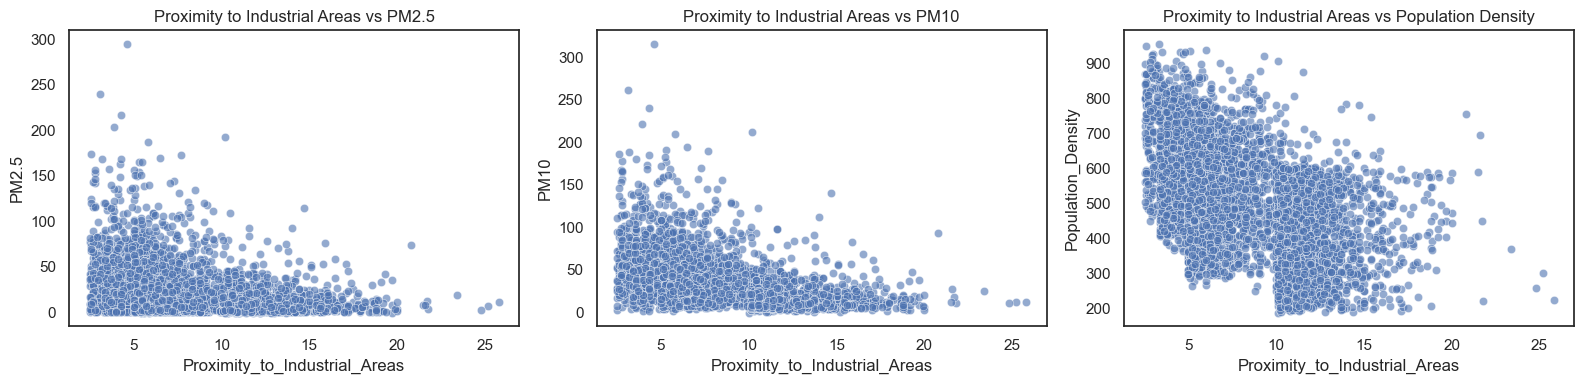

In [18]:
plt.figure(figsize=(16, 4))

# 1 - Proximity_to_Industrial_Areas vs PM2.5
plt.subplot(1, 3, 1) 
sns.scatterplot(data=df, x='Proximity_to_Industrial_Areas', y='PM2.5', alpha=0.6)
plt.title('Proximity to Industrial Areas vs PM2.5')

# 2 - Proximity_to_Industrial_Areas vs PM10
plt.subplot(1, 3, 2)
sns.scatterplot(data=df, x='Proximity_to_Industrial_Areas', y='PM10', alpha=0.6)
plt.title('Proximity to Industrial Areas vs PM10')

# 3 - Proximity_to_Industrial_Areas vs Population_Density
plt.subplot(1, 3, 3)
sns.scatterplot(data=df, x='Proximity_to_Industrial_Areas', y='Population_Density', alpha=0.6)
plt.title('Proximity to Industrial Areas vs Population Density')

plt.tight_layout()
plt.show()

#### 1. Proximity to Industrial Areas vs PM2.5

O scatterplot mostra uma correlação negativa entre a proximidade de áreas industriais e os níveis de PM2.5. Isso significa que, à medida que aumenta a proximidade de uma região a zonas industriais (ou seja, valores menores de “Proximity_to_Industrial_Areas”, se for distância), os níveis de PM2.5 tendem a ser mais elevados. Esse resultado faz sentido do ponto de vista ambiental: áreas mais próximas de polos industriais normalmente apresentam maior concentração de partículas finas devido à emissão de poluentes pelas indústrias.

#### 2. Proximity to Industrial Areas vs PM10

De maneira semelhante ao anterior, o gráfico de dispersão entre proximidade de áreas industriais e PM10 revela uma tendência negativa: quanto mais próximo das indústrias, maiores são os valores de PM10. Esse padrão confirma que a poluição particulada está associada à presença de atividades industriais, reforçando a importância desse atributo para a análise de qualidade do ar.

#### 3. Proximity to Industrial Areas vs Population Density

Nesse gráfico, nota-se também uma relação negativa, indicando que regiões próximas a áreas industriais tendem a apresentar maior densidade populacional, embora a dispersão dos pontos seja maior. Isso pode refletir o fato de zonas industriais estarem localizadas próximas a centros urbanos ou regiões densamente povoadas, o que é comum em muitos contextos urbanos.



## 4. Boxplots das Variáveis Numéricas por Classe de Air Quality

Os boxplots segmentados por classe da variável "Air Quality" ajudam a visualizar como cada atributo se comporta em diferentes níveis de qualidade do ar. Isso evidencia, por exemplo, se valores mais altos de PM2.5 e PM10 ocorrem majoritoriamente nas classes Poor ou Hazardous e valores mais baixos em Good. Além disso, permite ver o quanto os atributos conseguem discriminar entre as classes, facilitando a escolha de features importantes para o modelo.

Esse tipo de plot também ajuda a identificar se a separação entre as classes é clara (boxplots pouco sobrepostos) ou se há muita sobreposição, indicando maior dificuldade para os modelos diferenciarem as classes só com aquele atributo.

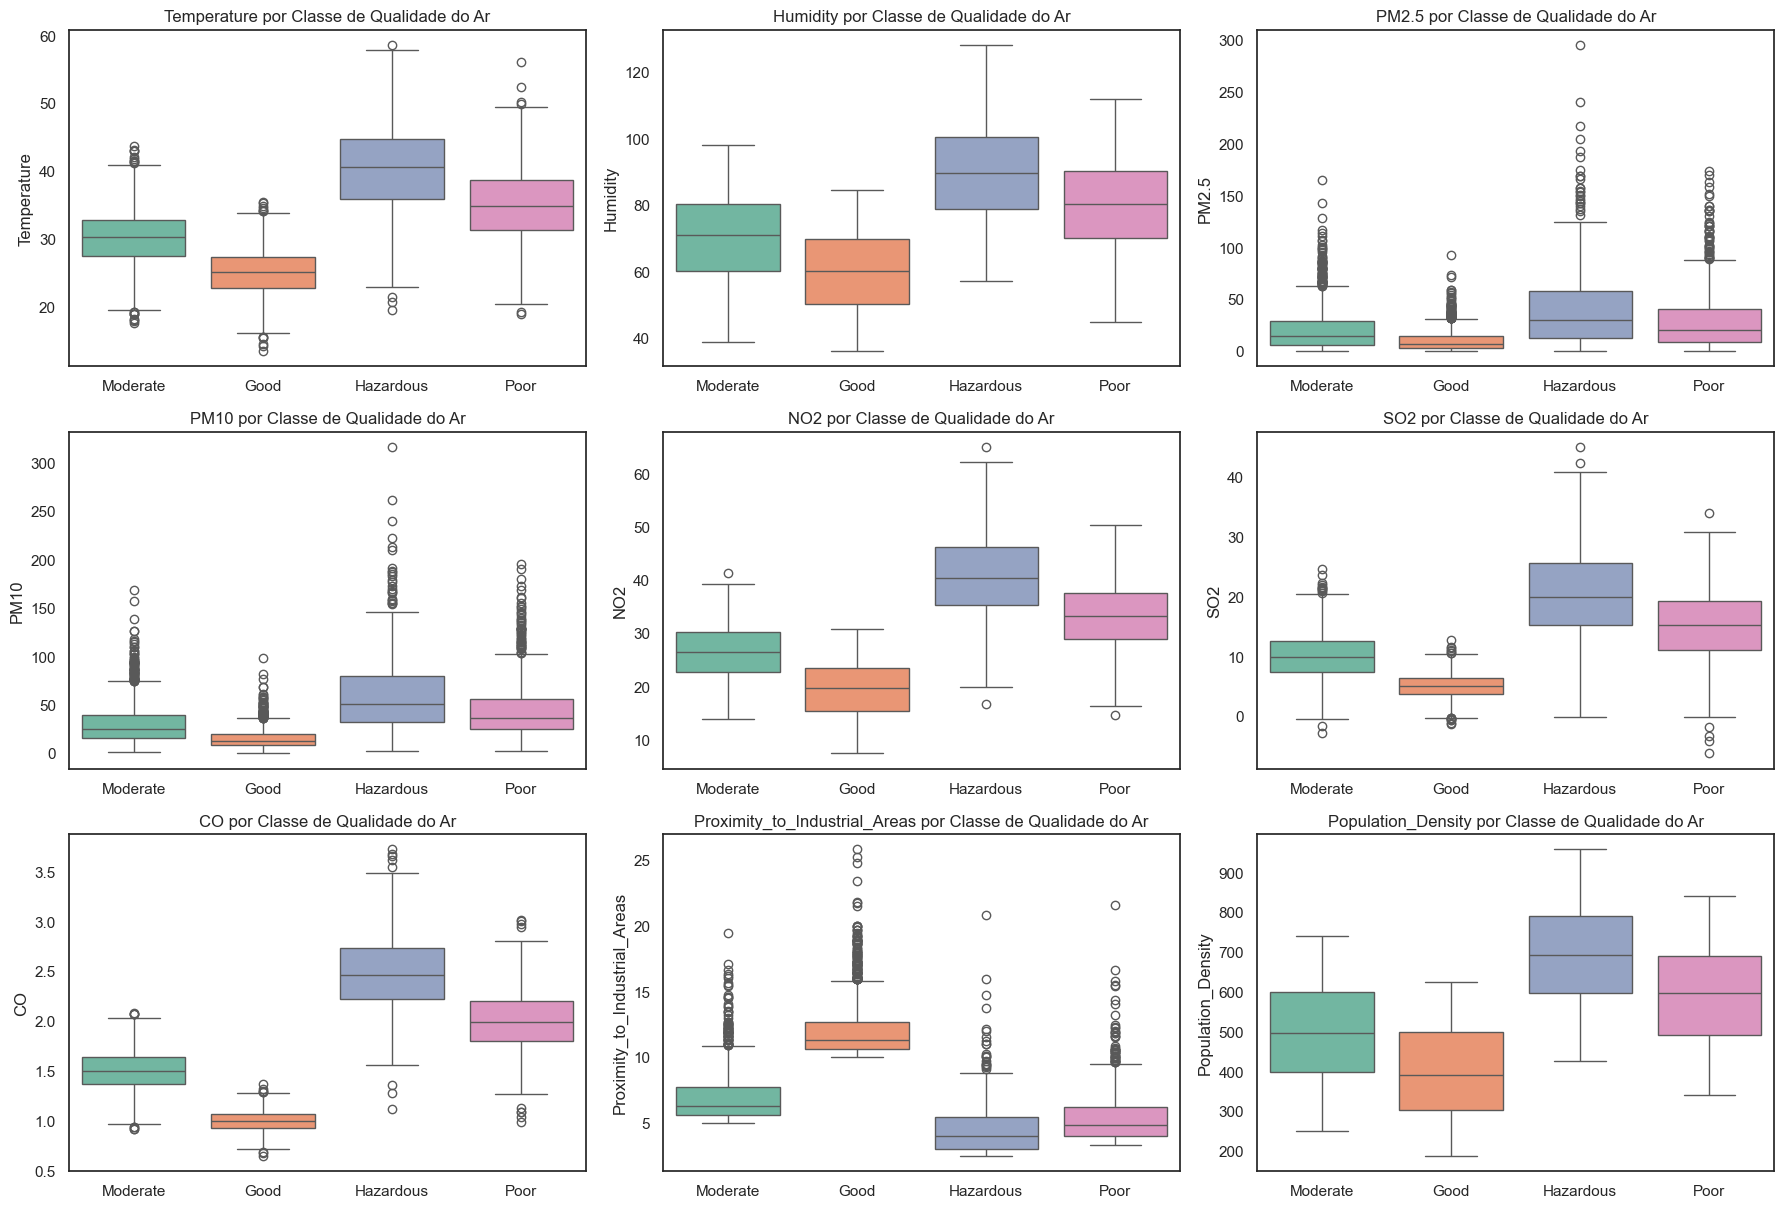

In [19]:
# Boxplots por classe da variável alvo
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 16))
axes = axes.ravel()
for i, col in enumerate(numeric_cols):
    sns.boxplot(x='Air Quality', y=col, data=df, ax=axes[i], palette='Set2')
    axes[i].set_title(f'{col} por Classe de Qualidade do Ar')
    axes[i].set_xlabel('')
    axes[i].set_ylabel(col)
# Ocultar subplots vazios (caso o número não feche certinho)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

### Tratamento do atributo alvo (LabelEncoder)

In [20]:
label_encoder = LabelEncoder()

df['Air Quality Encoded'] = label_encoder.fit_transform(df['Air Quality'])

print("Mapeamento da variável alvo:")
for i, label in enumerate(label_encoder.classes_):
    print(f"{label} -> {i}")

Mapeamento da variável alvo:
Good -> 0
Hazardous -> 1
Moderate -> 2
Poor -> 3


In [21]:
df.drop('Air Quality', axis = 1, inplace = True)
df.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality Encoded
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,2
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,2
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,2
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,0
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,0


In [22]:
df.to_csv("datasets/updated_pollution_dataset_encoded.csv", index=False)

### Padronização dos dados

In [23]:
std_scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[numeric_cols] = std_scaler.fit_transform(df_scaled[numeric_cols])
df_scaled.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality Encoded
0,-0.034080,-0.690715,-0.608589,-0.450455,-0.844581,-0.120721,0.402303,-0.588658,-1.168163,2
1,-0.257295,0.349507,-0.726706,-0.658892,0.493329,-0.046643,0.255775,-0.671748,0.743598,2
2,-1.031106,0.292768,0.267100,0.130973,-0.226219,0.383011,0.237459,-0.893318,0.795975,2
3,-0.435867,-1.951591,-0.571933,-0.874642,-1.451700,-0.698530,-0.641707,0.740767,0.350770,0
4,-0.525153,0.040593,-0.539349,-0.519934,-0.507293,-0.654083,-0.898130,1.183909,-1.272917,0


In [24]:
df_scaled.to_csv("datasets/updated_pollution_dataset_scaled.csv", index=False)

# 2. Comentário sobre o uso do StandScaler()

## 2.1 Por que utilizou-se o StandardScaler ao invés da normalização dos dados?

O StandardScaler realiza a padronização dos dados, transformando cada atributo para que tenha média zero e desvio padrão igual a um (Z-score). Ou seja, ele “centraliza” os dados e ajusta a escala considerando tanto a média quanto a dispersão.
Já a normalização geralmente refere-se ao Min-Max Scaling, que transforma os dados para um intervalo fixo, normalmente entre 0 e 1.

A padronização (StandardScaler) é preferida em muitos casos porque é menos sensível a outliers do que a normalização Min-Max, especialmente em distribuições não uniformes ou quando existem valores extremos. Além disso, alguns algoritmos de machine learning (como redes neurais e métodos baseados em distância, como SVM e KNN) podem se beneficiar de dados com média zero e variância unitária, pois isso ajuda no processo de otimização e acelera a convergência do treinamento.

## 2.2 Ele é melhor para problemas de classificação ou regressão? Ou não faz diferença?

A escolha entre padronização (StandardScaler) e normalização (Min-Max) não depende diretamente de ser um problema de classificação ou regressão, mas sim das características dos dados e do algoritmo utilizado.

* Para algoritmos que dependem de distâncias ou gradientes (como redes neurais, SVM, KNN e regressão logística), a padronização geralmente traz resultados melhores, independentemente de o problema ser de classificação ou regressão, porque garante que cada atributo contribua igualmente para o cálculo dos gradientes e distâncias.

* Para algoritmos baseados em árvores (como Random Forest ou Decision Trees), a padronização costuma ter pouco ou nenhum efeito, pois eles são invariantes à escala dos dados.

Em resumo: 
StandardScaler pode ser utilizado tanto para classificação quanto para regressão, e normalmente é a escolha padrão quando se trabalha com algoritmos sensíveis à escala, como redes neurais. O mais importante é testar as duas abordagens (StandardScaler e Min-Max) com validação cruzada e comparar o desempenho, pois em alguns casos específicos um pode ser superior ao outro.

## 2.3 As redes neurais se beneficiam com a padronização dos dados? Por quê?

Sim, redes neurais se beneficiam muito com a padronização dos dados.

Isso acontece por alguns motivos principais:
* Treinamento mais rápido e estável: Com entradas padronizadas (média zero e desvio padrão um), os gradientes calculados durante o treinamento têm magnitudes mais estáveis, evitando que certas entradas dominem o ajuste dos pesos e facilitando a convergência dos algoritmos de otimização.
* Evita saturação de funções de ativação: Funções como sigmoid e tanh podem “saturar” se receberem entradas muito grandes, tornando o gradiente próximo de zero (problema do “vanishing gradient”). Padronizar os dados reduz a chance de ocorrer saturação, melhorando a aprendizagem das camadas iniciais da rede.
* Pesos e bias mais equilibrados: Facilita o trabalho do otimizador, pois todos os pesos são ajustados em escalas semelhantes desde o início, evitando que uma feature desbalanceada atrapalhe o aprendizado global.